In [2]:
import pandas as pd

# Load raw dataset
df = pd.read_csv('../data/Fraud_Data.csv')

# Convert IP address to integer (you did this in Task 1)
df['ip_int'] = df['ip_address'].astype(float).astype(int)

# OPTIONAL: Add placeholder country column if your enrichment failed earlier
df['country'] = 'Unknown'

# Feature engineering (re-run if needed)
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])
df['hour_of_day'] = df['purchase_time'].dt.hour
df['day_of_week'] = df['purchase_time'].dt.dayofweek
df['time_since_signup'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds()

# Fill NA if any
df = df.fillna(0)

# Check shape
print(f"Loaded {df.shape[0]} rows.")


Loaded 151112 rows.


In [3]:
from sklearn.model_selection import train_test_split

# Drop unnecessary columns if you haven't already
# Assumes df has all features properly cleaned and engineered from Task 1
X = df.drop(columns=['class', 'ip_address', 'ip_int'])
y = df['class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")
print(f"Class distribution in training set:\n{y_train.value_counts(normalize=True)}")


Train shape: (120889, 13)
Test shape: (30223, 13)
Class distribution in training set:
class
0    0.906352
1    0.093648
Name: proportion, dtype: float64


In [5]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['source', 'browser', 'sex', 'country'], drop_first=True)

# Separate features and target
X = df_encoded.drop(columns=['class', 'ip_address', 'ip_int'])
y = df_encoded['class']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:
# Drop datetime columns before modeling
X = df_encoded.drop(columns=[
    'class', 'ip_address', 'ip_int', 
    'signup_time', 'purchase_time'  # 👈 Drop these
])
y = df_encoded['class']


In [11]:
X = df_encoded.drop(columns=[
    'class', 'ip_address', 'ip_int',
    'signup_time', 'purchase_time',
    'user_id', 'device_id'  # 👈 Drop identifiers
])
y = df_encoded['class']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Probabilities for AUC-PR
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]


In [14]:
# Confusion Matrices
print("Confusion Matrix - Logistic Regression")
print(confusion_matrix(y_test, y_pred_logreg))

print("\nConfusion Matrix - Random Forest")
print(confusion_matrix(y_test, y_pred_rf))

# F1 Scores
print("\nF1 Score - Logistic Regression:", f1_score(y_test, y_pred_logreg))
print("F1 Score - Random Forest:", f1_score(y_test, y_pred_rf))


Confusion Matrix - Logistic Regression
[[17864  9529]
 [  865  1965]]

Confusion Matrix - Random Forest
[[27391     2]
 [ 1339  1491]]

F1 Score - Logistic Regression: 0.27436470259703993
F1 Score - Random Forest: 0.6897987508674531


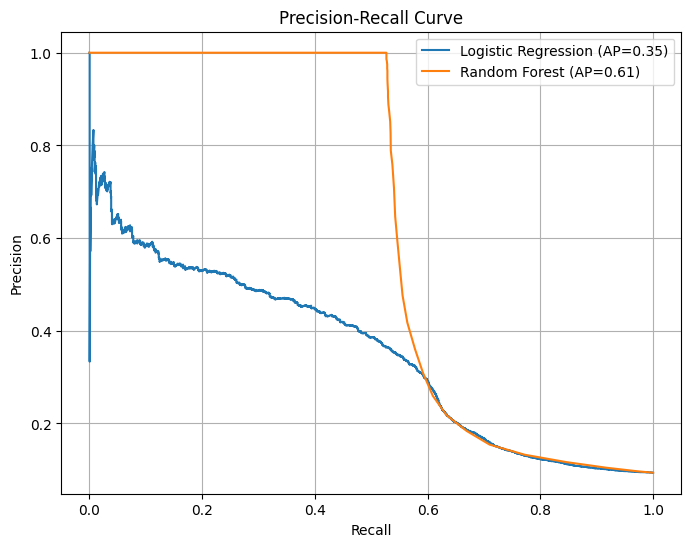

In [15]:
# PR Curve
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_prob_logreg)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(recall_logreg, precision_logreg, label=f'Logistic Regression (AP={average_precision_score(y_test, y_prob_logreg):.2f})')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP={average_precision_score(y_test, y_prob_rf):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()
